# PoC Spamfilter maken


## Load dataset (Part 1)

In [10]:
# Import
import pandas as pd

# Read and print CSV as DataFrame
df = pd.read_csv('./emails.csv')

## Clean text (Part 2)

In [11]:
# Import
import string
import nltk
import re

stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

# Function to apply
def Cleaner (value):
    # Remove non character
    value = re.sub('[^A-Za-z ]', '', value)
    
    # Normalize case
    value = "".join([i.lower() for i in value if i not in string.punctuation])
    
    # Tokenize
    value = nltk.tokenize.word_tokenize(value)
    
    # Remove stopwords and lemmatize
    value = [lemmatizer.lemmatize(i) for i in value if i not in stopwords]
#     value = [stemmer.stem(i) for i in value if i not in stopwords]
    
    return ' '.join(value)

# Clean text to new column (cleaned)
df['cleaned'] = df['text'].apply(Cleaner)

## Classification (Part 3)

### Vectorization

In [12]:
# Import
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()

# Fit and vectorize
matrix = vectorizer.fit_transform(df['cleaned'])

count_vect_df = pd.DataFrame(data = matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Append dataframe
df = pd.concat([df, count_vect_df], axis=1)

### Split data

In [13]:
# Import
from sklearn.model_selection import train_test_split

# Define in- and outputs
X = df.iloc[:, 3:]
y = df.iloc[:,1]

# Split set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Set 80%-20% as Training and Testing

### Fit data

In [14]:
# Import
from sklearn.preprocessing import StandardScaler

# Set and fit scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Train Model or ...

In [ ]:
from sklearn.svm import SVC

# Teach Model
classifier = SVC()
classifier.fit(X_train, y_train)

### Load model

In [16]:
# Import
import pickle
filename = 'SVC_TFIDF_Lemmatized.sav'

# Load model
classifier = pickle.load(open(filename, 'rb'))

### Test Model

In [17]:
# Import
from sklearn.metrics import accuracy_score

# Run predictions on Test set
y_pred = classifier.predict(X_test) 

### Confusion matrix

Test Data Accuracy: 0.9625


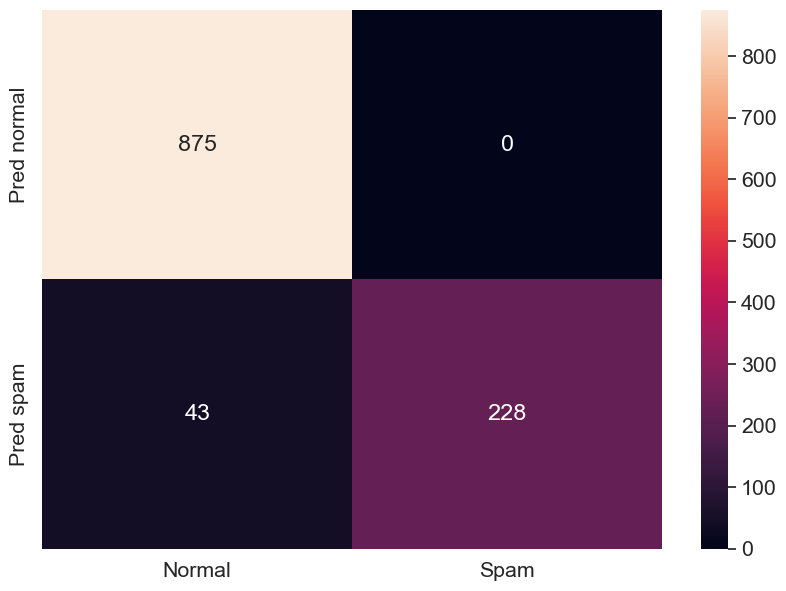

In [18]:
# Import
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = ("Pred normal", "Pred spam"), columns = ("Normal", "Spam"))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Summary report


In [19]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       875
           1       1.00      0.84      0.91       271

    accuracy                           0.96      1146
   macro avg       0.98      0.92      0.94      1146
weighted avg       0.96      0.96      0.96      1146



## Save model (Part extra)

In [ ]:
# Import
import pickle

# Save model
filename = 'SVC_TFIDF_Stemmed.sav'
pickle.dump(classifier, open(filename, 'wb'))